# Data importation and Acessing on Loan Application dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\annab\\OneDrive\\Desktop\\MY PROJECT\\loan prediction\\train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# checking for missing values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
#checking for duplicated values
df.duplicated().sum()

0

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# checking that summary the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# variable identication


In [8]:
#checking for the dimension od the dataframe
df.shape

(614, 13)

In [9]:
# checking for the percentage of the dataframe 
percentage=(df.isna().sum()/df.shape[0])*100
percentage

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [10]:
# to calculate the percentage 
percentage=(df.isna().sum()/df.shape[0])*100
percentage 
percentage=(df.isna().sum()/df.shape[0])*100
mis_values=df.isna().sum()#missing value
#join the missing value and percntage of the missing values
kas=pd.concat([mis_values,percentage],axis=1,keys=["mis_values","percentage"])
#to check the non misinfg value of the dataset with percentage
kas[kas["mis_values"]>0]

,mis_values,percentage
Gender,13,2.117264
Married,3,0.488599
Dependents,15,2.442997
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Loan_Amount_Term,14,2.280130
Credit_History,50,8.143322


In [11]:
df.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# DATA CLEANING

In [12]:
#FILL IN THE MISSING VALUES IN GENDER WITH CALCULATED MODE
#FIND THE MOST COMMON MISING VALUE
mode=df.Gender.mode()[0] #(because Gender is a categorical variable ie 0,1 or true/false)
df.Gender.fillna(mode,inplace=True)


In [13]:
df.Gender.mode()[0]

'Male'

In [14]:
mode=df.Dependents.mode()[0]
df.Dependents.fillna(mode,inplace=True)

In [15]:
df.Dependents.mode()[0]

'0'

In [16]:
mode=df.Married.mode()[0]
df.Married.fillna(mode,inplace=True)

In [17]:
df.Married.mode()[0]

'Yes'

In [18]:
mode=df.Self_Employed[0]
df.Self_Employed.fillna(mode,inplace=True)

In [19]:
df.Self_Employed.mode()[0]

'No'

In [20]:
LoanAmount_mean=round(df.LoanAmount.mean(),0)# beacuase Loan Amount is a continous variable 
df.LoanAmount.fillna(LoanAmount_mean,inplace=True)


In [21]:
df.LoanAmount

0      146.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

In [22]:
Loan_Amount_Term_mean=round(df.Loan_Amount_Term.mean(),0)
df.Loan_Amount_Term.fillna(Loan_Amount_Term_mean,inplace=True)

In [23]:
df.Loan_Amount_Term

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64

In [24]:
df.Credit_History

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [25]:
Credit_History_mean=round(df.Credit_History.mean(),0)
df.Credit_History.fillna(Credit_History_mean,inplace=True)

# DATA CLEANING

In [26]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [27]:
df.drop(columns=["CoapplicantIncome"])# dropping CoapplicantIncome because its not needed

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,146.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,187.0,360.0,1.0,Urban,Y


# DATA EXPLORATION

# UNIVARIANT ANALYSIS

In [28]:
Gender=df["Gender"].value_counts()
Gender

Male      502
Female    112
Name: Gender, dtype: int64

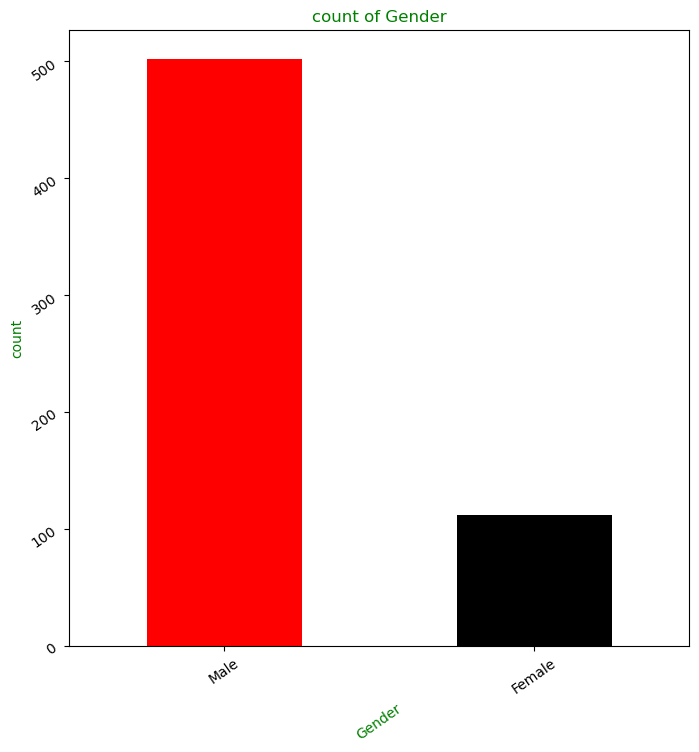

In [29]:
# using pandas plot
Gender.plot(kind="bar", color = ["red","black"], figsize = (8,8))
plt.title("count of Gender", color = "green")
plt.ylabel("count",color="green")
plt.xlabel("Gender", color = "green", rotation = 35)
plt.tick_params(axis ="y", rotation = 35, labelcolor = "black")
plt.tick_params(axis ="x", rotation = 35, labelcolor ="black" )



plt.show()# to remove all the inscription that comes along the chart

<AxesSubplot:>

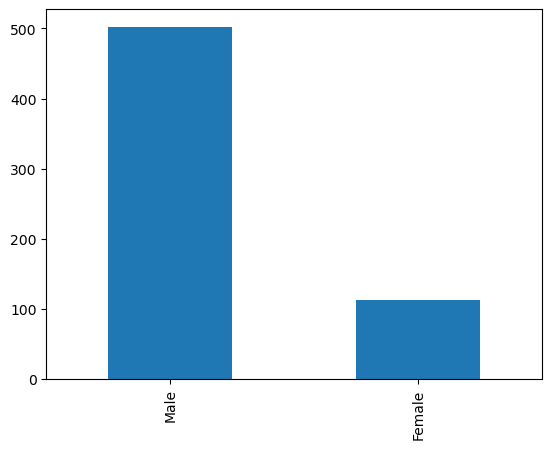

In [30]:
Gender.plot(kind="bar")

In [35]:
Marital_status=df["Married"].value_counts()
Marital_status.index=("Married","Not_married")
Marital_status

Married        401
Not_married    213
Name: Married, dtype: int64

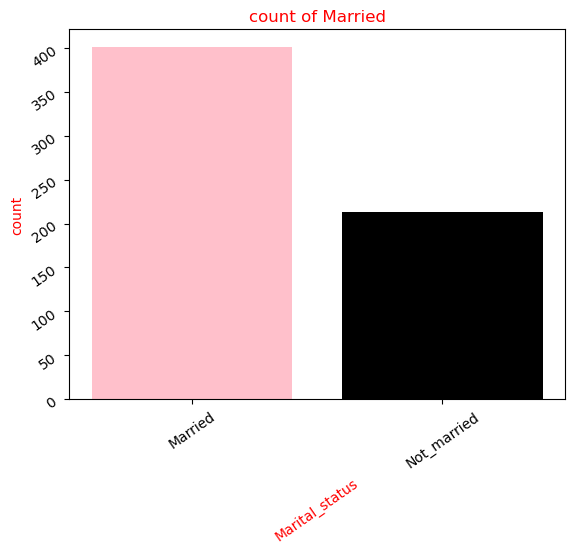

In [56]:
# USING MATPLOT
plt.bar(x=Marital_status.index,height=Marital_status.values,color=["pink","black"])
plt.title("count of Married",color="red")
plt.ylabel("count",color="red")
plt.xlabel("Marital_status", color = "red", rotation = 35)
plt.tick_params(axis ="y", rotation = 35, labelcolor = "black")
plt.tick_params(axis ="x", rotation = 35, labelcolor ="black" )


plt.show()# to remove all the inscription that comes along the chart